# **HW3**
## **Prerna Kaul**

### **Q1 - Autoencoder**

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dense, Dropout, Activation, Flatten
from matplotlib import pyplot as plt
import numpy as np
from keras.utils import np_utils
import random
%matplotlib inline

In [0]:
from keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [0]:
#plt.imshow(x_train[10])
#print(y_train[10])

In [0]:
# data reshaping
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalizing data to fall between 0 and 1
x_train /= 255
x_test /= 255

# coverting labels into 10 length one hot encoded vector
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [0]:
# setting up architecture
model = Sequential()

# encoder
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2,2), padding = 'same'))

# decoder
model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(1, (3,3), activation='sigmoid', padding = 'same'))


model.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 16)    

In [0]:
# per pixel binary crossentropy
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# since this is unsupervised learning, there will be no labels to predict from
autoencoder_history = model.fit(x_train, x_train,
          epochs = 50,
          batch_size = 128,
          validation_data = (x_test, x_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 16s 266us/step - loss: 0.3367 - acc: 0.5008 - val_loss: 0.2999 - val_acc: 0.5026
Epoch 2/50
60000/60000 [==============================] - 7s 122us/step - loss: 0.2938 - acc: 0.5056 - val_loss: 0.2927 - val_acc: 0.5034
Epoch 3/50
60000/60000 [==============================] - 7s 121us/step - loss: 0.2884 - acc: 0.5064 - val_loss: 0.2883 - val_acc: 0.5043
Epoch 4/50
60000/60000 [==============================] - 7s 121us/step - loss: 0.2848 - acc: 0.5068 - val_loss: 0.2855 - val_acc: 0.5051
Epoch 5/50
60000/60000 [==============================] - 7s 122us/step - loss: 0.2824 - acc: 0.5071 - val_loss: 0.2837 - val_acc: 0.5052
Epoch 6/50
60000/60000 [==============================] - 7s 120us/step - loss: 0.2806 - acc: 0.5073 - val_loss: 0.2819 - val_acc: 0.5053
Epoch 7/50
60000/60000 [==============================] - 7s 122us/step - loss: 0.2793 - acc: 0.5075 - val_loss: 

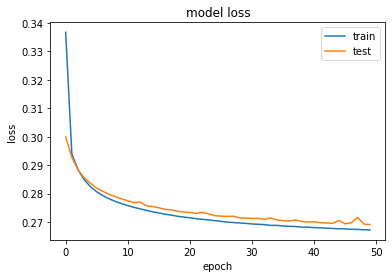

In [0]:
plt.plot(autoencoder_history.history['loss'])
plt.plot(autoencoder_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

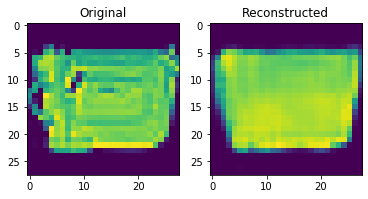

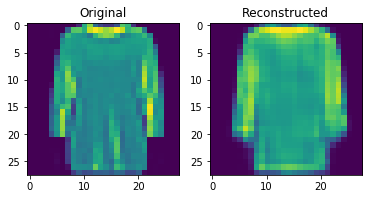

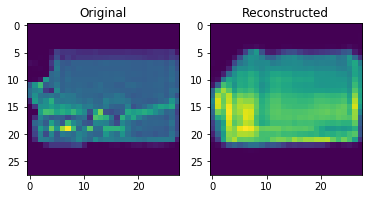

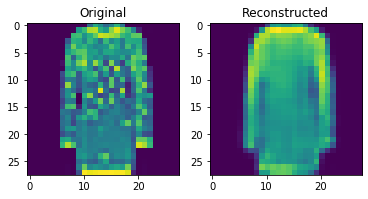

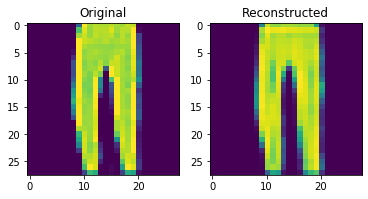

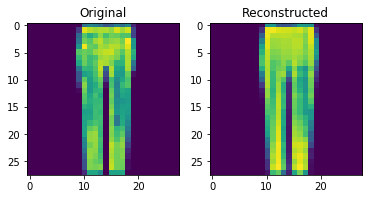

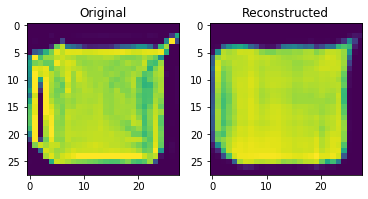

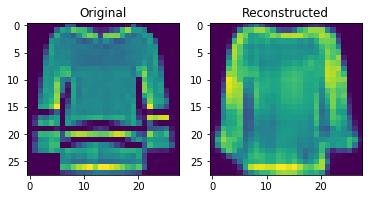

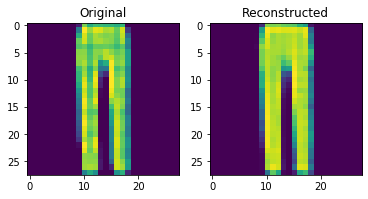

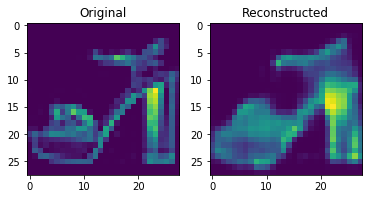

In [0]:
# random sample 
samp = random.sample(range(1, 10000), 10)

# random sample from the test set
preds = model.predict(x_test[samp])

# comparing original and reconstructed image
for i in range(len(preds)):
  plt.figure()
  plt.subplot(1, 2, 1)
  plt.title('Original')
  plt.imshow(x_test[samp[i]].reshape(28, 28))
  plt.subplot(1, 2, 2)
  plt.title('Reconstructed')
  plt.imshow(preds[i].reshape(28, 28))


### **Q2 - Image Classification**

### **2.1 - Deep CNN**

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'valid', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'valid'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(16, kernel_size = (3,3), activation = 'relu', padding = 'valid'))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 10, 10, 16)        4624      
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)              

In [0]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

class_model = model.fit(x_train, y_train,
                        batch_size = 128,
                        epochs = 25,
                        validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 8s 133us/step - loss: 0.5841 - acc: 0.7852 - val_loss: 0.3933 - val_acc: 0.8628
Epoch 2/25
60000/60000 [==============================] - 7s 116us/step - loss: 0.3632 - acc: 0.8700 - val_loss: 0.3119 - val_acc: 0.8834
Epoch 3/25
60000/60000 [==============================] - 7s 117us/step - loss: 0.3102 - acc: 0.8874 - val_loss: 0.2796 - val_acc: 0.8960
Epoch 4/25
60000/60000 [==============================] - 7s 118us/step - loss: 0.2797 - acc: 0.8985 - val_loss: 0.2636 - val_acc: 0.9044
Epoch 5/25
60000/60000 [==============================] - 7s 116us/step - loss: 0.2567 - acc: 0.9071 - val_loss: 0.2443 - val_acc: 0.9095
Epoch 6/25
60000/60000 [==============================] - 7s 116us/step - loss: 0.2399 - acc: 0.9133 - val_loss: 0.2337 - val_acc: 0.9132
Epoch 7/25
60000/60000 [==============================] - 7s 117us/step - loss: 0.2254 - acc: 0.9181 - val_loss: 0.2349 - 

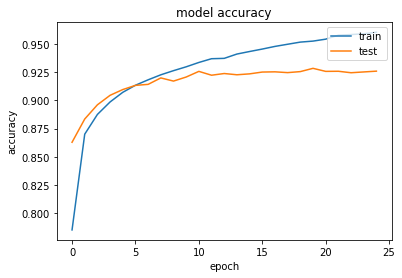

In [0]:
plt.plot(class_model.history['acc'])
plt.plot(class_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

The model begins with a convolutional layer having 32 filters of size 3 x 3 and relu activation with  valid padding. Added is another convolutional layers with same specs.<br>
After this a max pooling layer of size 2 x 2 is added to drop the size of intermediate image.<br>
A dropout layer is added to prevent overfitting.<br>
Again a convolutional layer with 16 kernels of size 3 x 3 with valid padding and relu activation.<br>
The output of these layers are then flattened and then a dense layer with output size 256 with relu activation is applied and then finally a dense layer with sofmax activation wil classify the images into 10 classes.<br><br>
The model achives an accuracy of 96.03% on train set with a loss of 0.10
and an accuracy of 92.5% on test set with a loss of 0.26.


### **2.2 - Transfer Learning**

In [0]:
from keras.applications import VGG16
from keras.preprocessing.image import img_to_array, array_to_img


In [0]:
(x_train1, y_train1), (x_test1, y_test1) = fashion_mnist.load_data()

# flattening the image
x_train1 = x_train1.reshape(x_train1.shape[0], 784).astype('float32')
x_test1 = x_test1.reshape(x_test.shape[0], 784).astype('float32')

# Convert the images into 3 channels for RGB
x_train1 = np.dstack([x_train1] * 3)
x_test1 = np.dstack([x_test1]*3)

# print(x_train1.shape)

# resizing into original dimensions
x_train1 = x_train1.reshape(x_train1.shape[0],28,28,3).astype('float32')
x_test1 = x_test1.reshape(x_test.shape[0],28,28,3).astype('float32')

# resizing into dimensions suited for VGG16 (> (32, 32))
x_train1 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in x_train1])
x_test1 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in x_test1])

print(x_train1.shape) 
print(x_test1.shape) 

x_train1 = x_train1 / 255
x_test1 = x_test1 / 255

# coverting labels into 10 length one hot encoded vector
y_train1 = np_utils.to_categorical(y_train1, 10)
y_test1 = np_utils.to_categorical(y_test1, 10)

(60000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
# load the base model
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(32,32,3))

# fit the model
model = Sequential()
model.add(conv_base)

# add our Feature Extractor
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

# freeze the base model weights
conv_base.trainable = False

# compile
model.compile(loss="categorical_crossentropy", 
              optimizer='adam',
              metrics=["acc"])

In [0]:
# fit
tl_history = model.fit(x_train1, y_train1,
          epochs=25,
          batch_size=128
          )

Epoch 1/25
60000/60000 [==============================] - 19s 325us/step - loss: 0.5904 - acc: 0.7947
Epoch 2/25
60000/60000 [==============================] - 18s 308us/step - loss: 0.4194 - acc: 0.8480
Epoch 3/25
60000/60000 [==============================] - 18s 307us/step - loss: 0.3836 - acc: 0.8597
Epoch 4/25
60000/60000 [==============================] - 18s 307us/step - loss: 0.3629 - acc: 0.8677
Epoch 5/25
60000/60000 [==============================] - 18s 308us/step - loss: 0.3439 - acc: 0.8745
Epoch 6/25
60000/60000 [==============================] - 18s 307us/step - loss: 0.3319 - acc: 0.8785
Epoch 7/25
60000/60000 [==============================] - 18s 308us/step - loss: 0.3187 - acc: 0.8823
Epoch 8/25
60000/60000 [==============================] - 18s 307us/step - loss: 0.3093 - acc: 0.8871
Epoch 9/25
60000/60000 [==============================] - 18s 307us/step - loss: 0.2978 - acc: 0.8908
Epoch 10/25
60000/60000 [==============================] - 18s 306us/step - loss: 

In [0]:
# evaluating the model on test set
score = model.evaluate(x_test1, y_test1, batch_size=64, verbose = 0)
print('Test Loss and Accuracy:', score)

Test Loss and Accuracy: [0.37575799117088315, 0.8724]


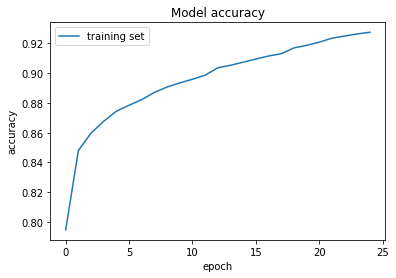

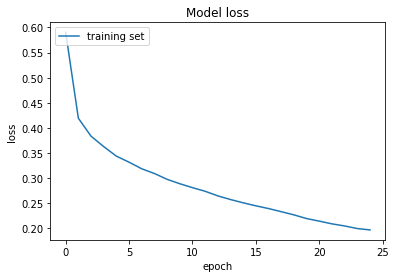

In [0]:
# accuracy plot
training_accuracy = tl_history.history['acc']
plt.plot(training_accuracy)
plt.title('Model accuracy')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Loss plot
training_loss = tl_history.history['loss']
plt.plot(training_loss)
plt.title('Model loss')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

The model achives an accuracy of 92.7% on train set with a loss of 0.19 and an accuracy of 87.2% on test set with a loss of 0.37.

### **Q3 - Text Classification**

### **3.1 - RNN**

In [0]:
import csv
import pandas as pd
import re
from sklearn.model_selection import train_test_split

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,Flatten
from tensorflow.keras.models import Model

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
root_dir = "drive/My Drive/"
file_dir = root_dir + "tweets_with_labels.csv"


In [0]:
df = pd.read_csv(file_dir, sep = "\t", error_bad_lines = False)

In [32]:
df.dropna()
df.head(5)

,id,tweet,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,1,Jazz for a Rainy Afternoon: {link},0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
1,2,RT: @mention: I love rainy days.,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
2,3,Good Morning Chicago! Time to kick the Windy C...,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0
3,6,Preach lol! :) RT @mention: #alliwantis this t...,0.0,0.0,0.0,0.0,0.0,0.0,0.604,0.0,0.196,0.0,0.0,0.0,0.201,0.0,0.0
4,9,@mention good morning sunshine,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.000,0.0,0.0


In [0]:
# labels for our dataset
df_labels = df[['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9','k10', 'k11', 'k12', 'k13', 'k14', 'k15']]

# preprocessing function
def preprocess_text(sen):

    # remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # ringle character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

# preprocessing
corpus = list(df["tweet"])
X = [preprocess_text(sen) for sen in corpus]
y = df_labels.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# tokenizer and convert to input
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

# Max number of words
max_features = 10000

max_len = 64

X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)

In [43]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(54562, 64) (54562, 15)
(23384, 64) (23384, 15)


In [0]:
# setting up RNN
from tensorflow.keras.layers import LSTM,Embedding

class TextLSTM():
    def __init__(self,max_len,max_features):
        self.max_len = max_len
        self.max_features = max_features
        self.model = self.build_model()

    def build_model(self):
        input_sen = Input(shape=(self.max_len,))
        x = Embedding(self.max_features, 32)(input_sen)
        x = LSTM(32)(x)
        output = Dense(15, activation='sigmoid')(x)
        return Model(input_sen,output)

    def fit(self,x_train,y_train,x_test,y_test):
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        self.model.summary()
        res = self.model.fit(x_train, y_train,
                       epochs=20,
                       batch_size=64,
                       shuffle=True,
                       validation_data=(x_test, y_test))
        return res

In [59]:
TL = TextLSTM(max_len,max_features)
history_LSTM = TL.fit(X_train,y_train,X_test,y_test)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 64, 32)            320000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 15)                495       
Total params: 328,815
Trainable params: 328,815
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 54562 samples, validate on 23384 samples
Epoch 1/20
54562/54562 [==============================] - 75s 1ms/sample - loss: 2.7123 - acc: 0.2869 - val_l

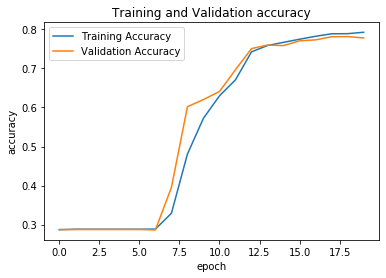

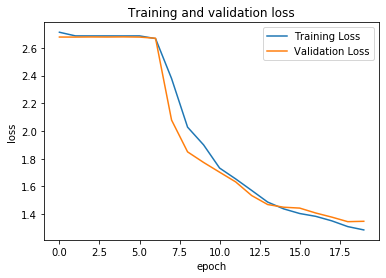

In [75]:
plt.figure()
acc = history_LSTM.history['acc']
val_acc = history_LSTM.history['val_acc']
loss = history_LSTM.history['loss']
val_loss = history_LSTM.history['val_loss']

# accuracy
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

# loss
plt.figure()
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

### **3.2 - CNN**

In [0]:
from tensorflow.keras.layers import Dropout,Conv1D,GlobalMaxPooling1D

class TextCNN():
    def __init__(self,max_len,max_features):
        self.max_len = max_len
        self.max_features = max_features
        self.model = self.build_model()

    def build_model(self):
        input_sen = Input(shape=(self.max_len,))
        x = Embedding(self.max_features, 32)(input_sen)
        x = Conv1D(64,3,padding='same',activation='relu',strides=1)(x)
        x = GlobalMaxPooling1D()(x)
        x = Dense(150,activation="relu")(x)
        output = Dense(15, activation='sigmoid')(x)
        return Model(input_sen,output)

    def fit(self,x_train,y_train,x_test,y_test):
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        self.model.summary()
        res = self.model.fit(x_train, y_train,
                       epochs=5,
                       batch_size=64,
                       shuffle=True,
                       validation_data=(x_test, y_test))
       
        return res

In [74]:
TC = TextCNN(max_len,max_features)
history_CNN = TC.fit(X_train,y_train,X_test,y_test)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 64, 32)            320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 64, 64)            6208      
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               9750      
_________________________________________________________________
dense_2 (Dense)              (None, 15)                2265      
Total params: 338,223
Trainable params: 338,223
Non-trainable params: 0
_____________________________________________________

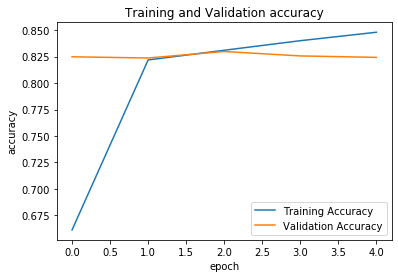

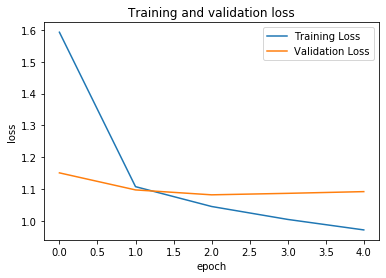

In [77]:
plt.figure()
acc = history_CNN.history['acc']
val_acc = history_CNN.history['val_acc']
loss = history_CNN.history['loss']
val_loss = history_CNN.history['val_loss']

# accuracy
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

# loss
plt.figure()
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

### **3.2 - Comparing results from RNN and CNN**

In [0]:
from sklearn.metrics import roc_curve, auc


In [0]:
def plot_roc(test_TL,test_TC,test_target,i):
    fprl, tprl, _ = roc_curve(test_target,test_TL)
    fprc, tprc,_ = roc_curve(test_target,test_TC)
    plt.figure()
    lw = 0.5
    # RNN
    plt.plot(fprl, tprl, color='blue',
             lw=lw, label='ROC curve for RNN (area = %0.3f)' % auc(fprl,tprl))
    # CNN
    plt.plot(fprc, tprc, color='orange',
             lw=lw, label='ROC curve for CNN (area = %0.3f)' % auc(fprc,tprc))
    plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
    plt.xlim([-0.02, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for label k%s' % str(i+1))
    plt.legend(loc="lower right")
    plt.show()

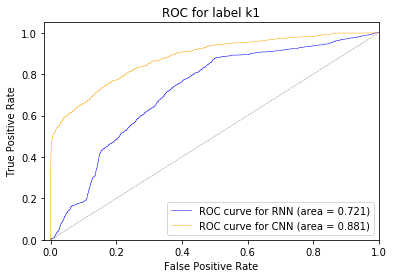

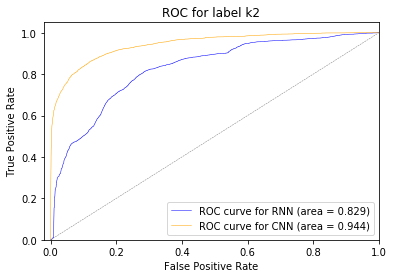

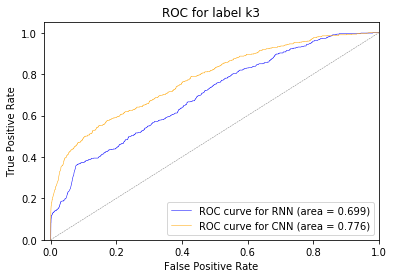

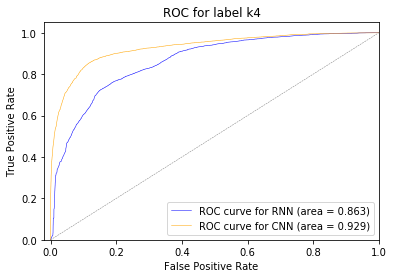

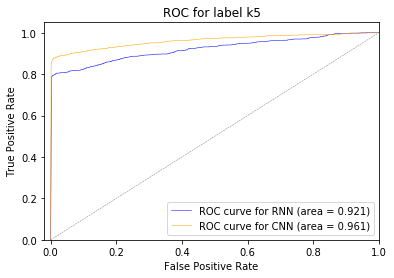

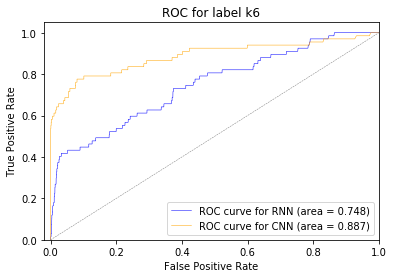

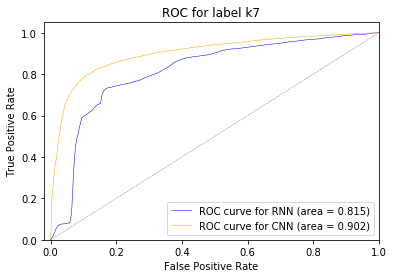

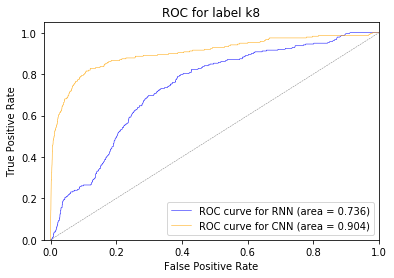

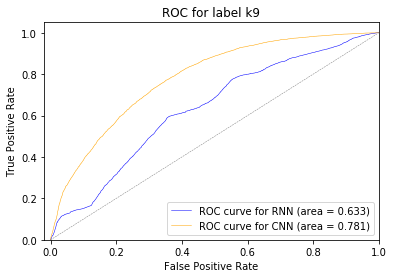

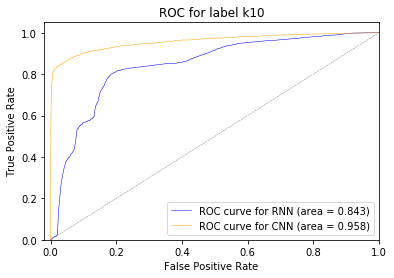

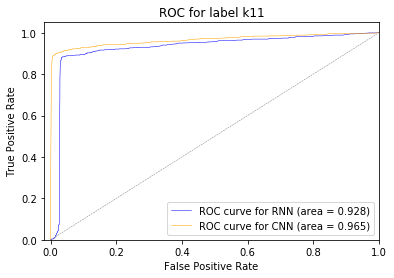

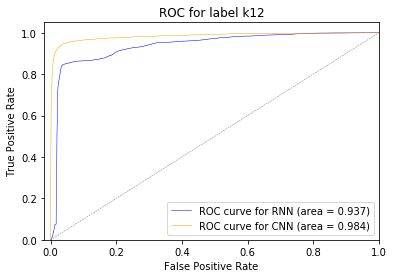

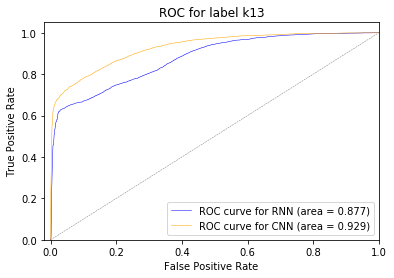

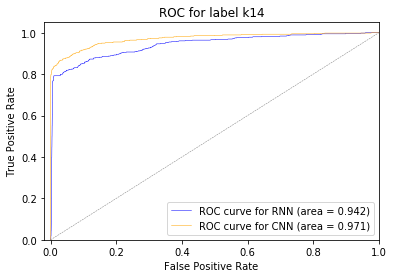

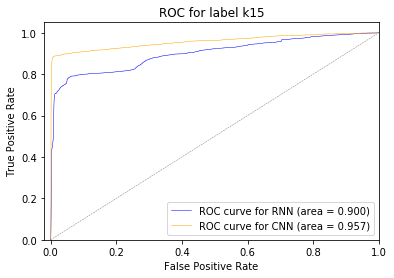

In [82]:
for i in range(15):
    test_TL = TL.model.predict(X_test)[:,i]
    test_TC = TC.model.predict(X_test)[:,i]
    test_target = y_test[:,i]>0
    plot_roc(test_TL,test_TC,test_target,i)

From these graphs, we can see ROC curves for CNN are always above the ROC curves for RNN. So CNN performs better than RNN for most of the labels in this case.